In [1]:
#bibliotecas
import numpy as np
import matplotlib.pyplot as plt
import control.matlab as ctl

In [2]:
#função de Transferencia
# G(s) = 1/s(0.1s+1) => G(s) = 1/ 0.1s^2+ s
num = np.array([1])
den = np.array([0.1,1,0])
G_s = ctl.tf(num,den)
print(G_s)


     1
-----------
0.1 s^2 + s



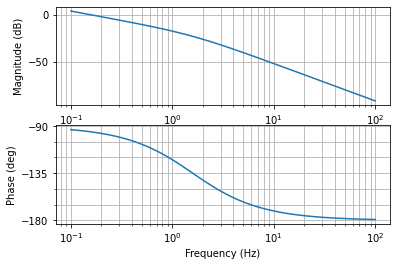

In [4]:
mag, phase, omega = ctl.bode(G_s)

In [7]:
gm, pm, wg, wp = ctl.margin(G_s)
print(gm)
print(pm)
print(wg)
print(gm)

inf
